### Viviescas Phys. Rev. Lett. 105 2010

This reference revolves around the problem of finding an efficient, dynamical characterization of entanglement for open systems, characterization that turns to be a major challenge when dealing with mixed states. Here, the authors based on $\textit{Carvalho et al. Phys. Rev. Lett. 98 2007}$, show the existence of an optimal pure state unraveling, such that the average entanglement measure corresponds to the mixed state entanglement.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1,'../../qt_unraveling')
import qt_unraveling as qtr

import matplotlib
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

%load_ext autotime
%load_ext line_profiler

The system is defined as follows

In [2]:
## Viviescas Phys. Rev. Lett. 105 2010

#### Parameters 
gamma = 5
t0 = 0
tf = 1
time_steps = 7000

## Time range
t = np.linspace(t0, tf, np.int32(time_steps))

## Initial state 
qub0 = np.array([0,1], dtype = np.complex128)
qub1 = np.array([1,0], dtype = np.complex128)

psi00_1 = (1/np.sqrt(8))
psi01_1 = (1/np.sqrt(8))*(-1)
psi10_1 = (1/np.sqrt(8))*1j
psi11_1 = (1/np.sqrt(8))*1j*np.sqrt(5)

psi00_2 = (1/np.sqrt(8))*1j*np.sqrt(5) 
psi01_2 = (1/np.sqrt(8))*(-1)
psi10_2 = (1/np.sqrt(8))*1j 
psi11_2 = (1/np.sqrt(8))

psi0_1 = (psi00_1*np.kron(qub0,qub0) + psi01_1*np.kron(qub0,qub1) + psi10_1*np.kron(qub1,qub0) + psi11_1*np.kron(qub1,qub1))
psi0_2 = (psi00_2*np.kron(qub0,qub0) + psi01_2*np.kron(qub0,qub1) + psi10_2*np.kron(qub1,qub0) + psi11_2*np.kron(qub1,qub1))

## Hamiltonian
def H(t):
    return np.zeros((4,4), dtype = np.complex128)

## Lindblad operators
def L(t):
    return [np.sqrt(gamma)*np.kron(qtr.sigmam, np.eye(2)), np.sqrt(gamma)*np.kron(np.eye(2),qtr.sigmam)]

## Additional definition
def C_bar(psi):
    op = np.kron(qtr.sigmay,qtr.sigmay)
    return np.dot(psi,np.dot(op,psi))

## Theta opt
theta_opt_1 = np.angle(np.conjugate(C_bar(psi0_1))*(psi11_1)**2)
theta_opt_2 = np.angle(np.conjugate(C_bar(psi0_2))*(psi11_2)**2)

## Unraveling
u_opt_1 = np.array([[0, -1*np.exp(1j*theta_opt_1)],[-1*np.exp(1j*theta_opt_1), 0]], dtype = np.complex128)
u_opt_2 = np.array([[0, -1*np.exp(1j*theta_opt_2)],[-1*np.exp(1j*theta_opt_2), 0]], dtype = np.complex128)

time: 8.44 ms


With the above definitions the can generate a $\texttt{System class}$ object for each initial condition

In [3]:
## Class object
qubits_1 = qtr.System(H, psi0_1, t, lindbladList = L, uMatrix = u_opt_1)
qubits_2 = qtr.System(H, psi0_2, t, lindbladList = L, uMatrix = u_opt_2)

time: 24.9 ms


To show the difference between the $\texttt{euler}$ and $\texttt{milstein}$ integrator we calculate the average concurrence of the following ensembles

In [4]:
## Psi emsemble
n_traj = 1000
psi_ensemble_milstein = qubits_1.diffusivePsiEnsemble(n_traj, method = 'milstein')
psi_ensemble_euler = qubits_1.diffusivePsiEnsemble(n_traj, method = 'euler')

time: 1h 18min 19s


In [9]:
## Analitical concurrence
C_analytical = [qtr.concurrence_rho(rho) for rho in qubits_1.lindbladAnalitical()]

## Average concurrence
C_vec_euler = [(1./n_traj)*np.sum(np.array([qtr.concurrence_psi(psi) for psi in psi_t])) for psi_t in np.array(psi_ensemble_euler).swapaxes(0, 1)]
C_vec_milstein = [(1./n_traj)*np.sum(np.array([qtr.concurrence_psi(psi) for psi in psi_t])) for psi_t in np.array(psi_ensemble_milstein).swapaxes(0, 1)]

## Data save
np.save('data/data_viviescas_integrators.npy', np.array([t, C_vec_euler, C_vec_milstein, C_analytical]))

time: 9min 49s


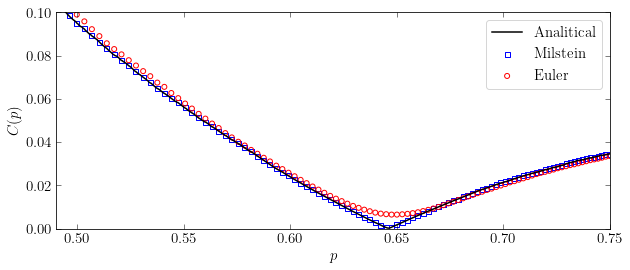

time: 320 ms


In [10]:
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots()
fig.set_size_inches(w=9, h=4)

data = np.load('data/data_viviescas_integrators.npy', allow_pickle = True)

## Time scaling
p = 1 - np.exp(-gamma*data[0])

axs.tick_params(axis='both', which = 'major', reset = True, direction='in', length = 5, width=0.5, colors='black', grid_color='grey', grid_alpha=0.3)
axs.tick_params(axis='both', which = 'minor', reset = True, direction='in', length = 3, width=0.5, colors='black', grid_color='grey', grid_alpha=0.3)

# Plot
axs.plot(p, data[2], label = 'Analitical', color = 'black')
axs.scatter(p[::10], data[2][::10], s = 25, marker = 's', facecolors='none', edgecolors='b', label = r'Milstein')
axs.scatter(p[::10], data[1][::10], s = 25, facecolors='none', edgecolors='r', label = r'Euler')

axs.set_xlabel(r'$p$')
axs.set_ylabel(r'$C(p)$')
axs.set_xlim(0.49,0.75)
axs.set_ylim(0,0.1)

axs.legend()

plt.tight_layout()

The behavior of a single trajectory for both initial states can be obtained as follows

In [ ]:
## Analitical concurrence
lind_evo_1 = [qtr.concurrence_rho(rho) for rho in qubits_1.lindbladAnalitical()]
lind_evo_2 = [qtr.concurrence_rho(rho) for rho in qubits_2.lindbladAnalitical()]

# Individual trajectories
traj_1 = [qtr.concurrence_psi(psi) for psi in qubits_1.diffusivePsiTrajectory(36401, method = 2)]
traj_2 = [qtr.concurrence_psi(psi) for psi in qubits_2.diffusivePsiTrajectory(865, method = 2)]

## Data save
np.save('data/data_viviescas_1.npy', np.array([t, traj_1, lind_evo_1]))
np.save('data/data_viviescas_2.npy', np.array([t, traj_2, lind_evo_2]))

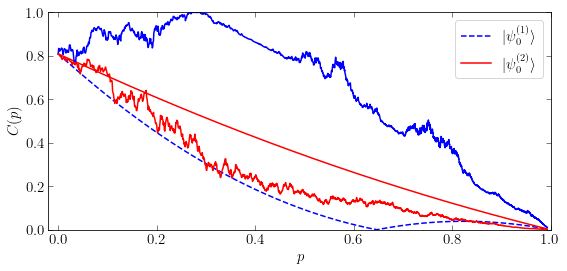

time: 465 ms


In [8]:
plt.rcParams.update({'font.size': 15})
fig, axs = plt.subplots()
fig.set_size_inches(w=9, h=4)

data_1 = np.load('data/data_viviescas_1.npy', allow_pickle = True)
data_2 = np.load('data/data_viviescas_2.npy', allow_pickle = True)

## Time scaling
p = 1 - np.exp(-gamma*data_1[0])

axs.tick_params(axis='both', which = 'major', reset = True, direction='in', length = 5, width=0.5, colors='black', grid_color='grey', grid_alpha=0.3)
axs.tick_params(axis='both', which = 'minor', reset = True, direction='in', length = 3, width=0.5, colors='black', grid_color='grey', grid_alpha=0.3)

# Plot
axs.plot(p, data_1[2], label = r'$| \psi^{(1)}_0 \rangle$', color = 'blue', linestyle = '--')
axs.plot(p, data_2[2], label = r'$| \psi^{(2)}_0 \rangle$', color = 'red')
axs.plot(p, data_1[1], color = 'blue')
axs.plot(p, data_2[1], color = 'red')

axs.set_xlabel(r'$p$')
axs.set_ylabel(r'$C(p)$')
axs.set_xlim(-0.02,1)
axs.set_ylim(0,1)
axs.legend()